In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


## Data overview 
   . we will be using simplified version of the loan dataset .
   . such as income ,loan_amount,term,credit history,and defaulted

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")
print("Path to dataset files:", path)




Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\parisrohan\credit-score-classification\versions\1


In [24]:


train_df = pd.read_csv(f"{path}/train.csv")
test_df = pd.read_csv(f"{path}/test.csv")



C:\Users\Hp\AppData\Local\Temp\ipykernel_2144\251902917.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f"{path}/train.csv")


In [25]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [26]:
train_df.shape

(100000, 28)

In [27]:
test_df.shape

(50000, 27)

In [28]:
train_df.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [29]:
test_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [30]:
test_df.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [31]:
train_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [32]:
train_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Preprocessing of Data
     ### 1.Remove junk columns → ID/Name/SSN.

     ### 2. Fix datatypes → numbers should be numeric, text categories should be categorical.

     ### 3. Handle missing values → mean/median for numbers, mode for categories.

     ###  4. Scale → keep ranges consistent.
     
    

In [33]:
# Removing of junk columns
train_df=train_df.drop(['ID','Name','SSN','Customer_ID'],axis=1)

 Fix data types

In [34]:
for col in ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt',
            'Amount_invested_monthly', 'Monthly_Balance']:
    train_df[col] = pd.to_numeric(train_df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True), errors='coerce')
train_df.dtypes 

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

# Columns that are categorical
cat_cols = [
    
    'Type_of_Loan',
    'Credit_Mix',
    'Credit_History_Age',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score',
    'Occupation' 
]


le = LabelEncoder()


for col in cat_cols:
    train_df[col] = le.fit_transform(train_df[col].astype(str))


In [36]:
train_df.dtypes

Month                         int64
Age                           int64
Occupation                    int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                  int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount         int64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

Handling missing values 

In [37]:
train_df.isnull().sum()[train_df.isnull().sum()>0]

Monthly_Inhand_Salary      15002
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries        1965
Amount_invested_monthly     4479
Monthly_Balance             1200
dtype: int64

In [38]:
from sklearn.impute import SimpleImputer
# imputer for numerical columns
num_imputer=SimpleImputer(strategy='mean')

#imputer for categorical columns
cat_imputer=SimpleImputer(strategy='most_Frequent')

# numerical columns
missing_cols=['Monthly_Inhand_Salary' ,    
'Num_of_Delayed_Payment'  ,   
'Changed_Credit_Limit',        
'Num_Credit_Inquiries',        
'Amount_invested_monthly',     
'Monthly_Balance']

train_df[missing_cols]=num_imputer.fit_transform(train_df[missing_cols])

Scaling of data 

In [39]:
from sklearn.preprocessing import StandardScaler 

X=train_df.drop('Credit_Score',axis=1)
y=train_df['Credit_Score']  

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

print(X_scaled[:5])


[[-2.18217890e-01 -1.40940711e-01  9.64732035e-01 -1.10031045e-01
  -8.07222110e-01 -1.20023596e-01 -1.43149644e-01 -1.48934430e-01
  -1.09435203e-01 -1.71420681e+00 -1.21593160e+00 -1.09860020e-01
   1.21856104e-01 -1.24192909e-01  1.40207261e+00 -5.33484523e-01
  -1.06756177e+00 -2.87093635e-01 -5.81489738e-01 -1.62959705e-01
  -2.78913801e-01 -2.30434285e-01 -9.60249504e-03]
 [-6.54653671e-01 -1.40940711e-01  9.64732035e-01 -1.10031045e-01
   0.00000000e+00 -1.20023596e-01 -1.43149644e-01 -1.48934430e-01
  -1.09435203e-01 -1.71420681e+00 -1.48511006e+00 -1.62990408e-17
   1.21856104e-01 -1.24192909e-01 -5.71010151e-01 -5.33484523e-01
  -6.64886596e-02  1.56428033e+00 -5.81489738e-01 -1.62959705e-01
  -2.59953130e-01  2.60854912e-01 -9.60249504e-03]
 [ 1.09108945e+00  5.55659932e-01  9.64732035e-01 -1.10031045e-01
   0.00000000e+00 -1.20023596e-01 -1.43149644e-01 -1.48934430e-01
  -1.09435203e-01 -1.71420681e+00 -1.21593160e+00 -1.09860020e-01
   0.00000000e+00 -1.24192909e-01 -5.710

# visulaization of Data


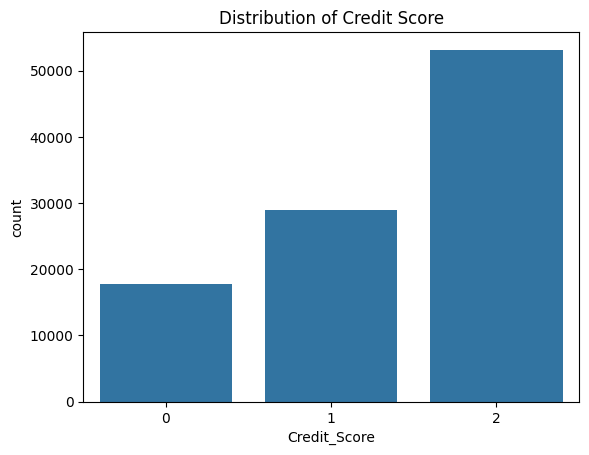

In [40]:
sns.countplot(x='Credit_Score',data=train_df)
plt.title('Distribution of Credit Score')
plt.show()

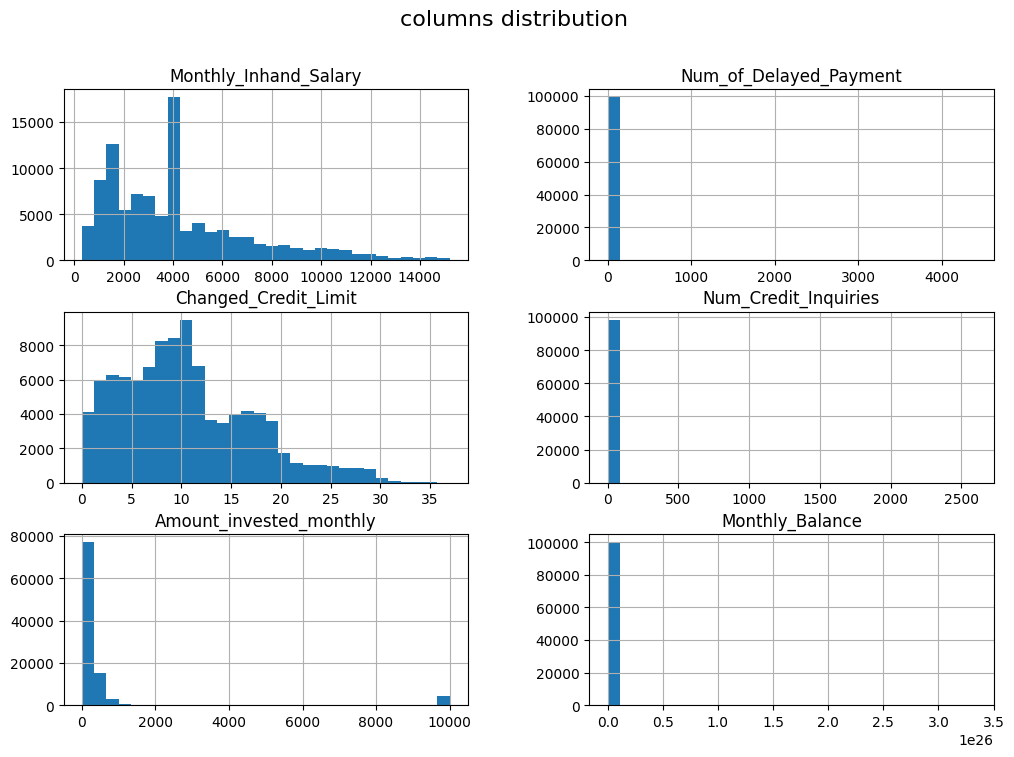

In [41]:
numeric_cols=['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
                'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                'Amount_invested_monthly', 'Monthly_Balance']
train_df[numeric_cols].hist(bins=30,figsize=(12,8))
plt.suptitle('columns distribution',size=16)
plt.show()

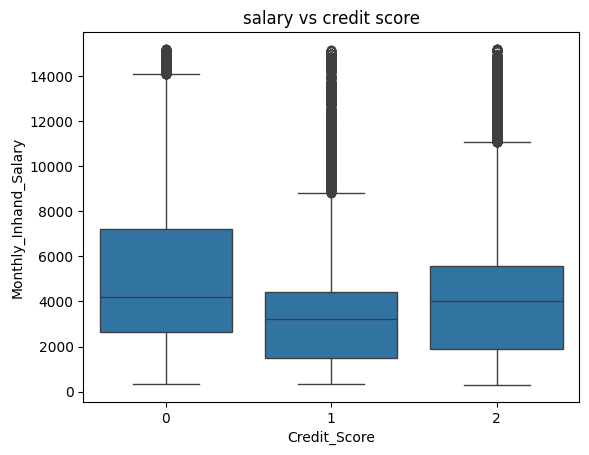

In [42]:
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary',data=train_df)
plt.title('salary vs credit score')
plt.show()

cat_features = cat_features.tolist() + ['Month']
num_features = num_features.drop('Month')


# Generation of Pipeline to clean test dataset 
   1.Minimal manual cleaning (drop unnecessary columns, fix data types).

   2.Build pipeline (define preprocessing + model).

   3.Fit pipeline on train data.

   4.Use pipeline to transform + predict test data.
  

In [52]:
train_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23,4,19114.12,1824.843333,3,4,3,4,313,...,3,809.98,26.822620,91,1,49.574949,80.415295,3,312.494089,0
1,2,23,4,19114.12,4194.170850,3,4,3,4,313,...,1,809.98,31.944960,340,1,49.574949,118.280222,4,284.629162,0
2,6,500,4,19114.12,4194.170850,3,4,3,4,313,...,1,809.98,28.609352,95,1,49.574949,81.699521,5,331.209863,0
3,0,23,4,19114.12,4194.170850,3,4,3,4,313,...,1,809.98,31.377862,96,1,49.574949,199.458074,6,223.451310,0
4,7,23,4,19114.12,1824.843333,3,4,3,4,313,...,1,809.98,24.797347,97,1,49.574949,41.420153,2,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,25,15,39628.99,3359.415833,4,6,7,2,5910,...,3,502.38,34.663572,232,1,35.104023,60.971333,1,479.866228,1
99996,7,25,15,39628.99,3359.415833,4,6,7,2,5910,...,3,502.38,40.565631,233,1,35.104023,54.185950,2,496.651610,1
99997,5,25,15,39628.99,3359.415833,4,6,5729,2,5910,...,1,502.38,41.255522,234,1,35.104023,24.028477,1,516.809083,1
99998,4,25,15,39628.99,3359.415833,4,6,7,2,5910,...,1,502.38,33.638208,236,1,35.104023,251.672582,4,319.164979,2


In [65]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib

# Custom transformer for dataset-specific cleaning
class DataCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        # Numeric columns with potential '_' or invalid strings
        num_cols_with_issues = [
            'Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
            'Monthly_Balance'
        ]
        for col in num_cols_with_issues:
            if col in X_copy.columns:
                X_copy[col] = X_copy[col].apply(lambda v: str(v).replace('_', '') if pd.notnull(v) else np.nan)
                X_copy[col] = pd.to_numeric(X_copy[col], errors='coerce')
        
        # Cap invalid ages
        if 'Age' in X_copy.columns:
            X_copy['Age'] = np.where((X_copy['Age'] < 0) | (X_copy['Age'] > 100), np.nan, X_copy['Age'])
        
        # Convert 'Credit_History_Age' to total months
        if 'Credit_History_Age' in X_copy.columns:
            def to_months(s):
                if pd.isna(s):
                    return np.nan
                try:
                    parts = s.split()
                    years = int(parts[0])
                    months = int(parts[3])
                    return years * 12 + months
                except:
                    return np.nan
            X_copy['Credit_History_Age'] = X_copy['Credit_History_Age'].apply(to_months)
        
        # Clean invalid categorical values
        invalid_map = {
            'Occupation': '_______',
            'Credit_Mix': '_',
            'Payment_Behaviour': '!@9#%8'
        }
        for col, invalid in invalid_map.items():
            if col in X_copy.columns:
                X_copy[col] = X_copy[col].replace(invalid, np.nan)
        
        return X_copy

# Custom transformer to drop columns
class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(columns=self.columns_to_drop, errors='ignore')

In [66]:
# Define feature lists
numeric_features = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]
categorical_features = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan']

In [67]:
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combined preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Full pipeline
model_pipeline = Pipeline(steps=[
    ('data_cleaner', DataCleaner()),
    ('column_dropper', ColumnDropper(columns_to_drop)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [68]:
# Prepare data
X_train = train_df.drop('Credit_Score', axis=1)
y_train = train_df['Credit_Score']
X_test = test_df.copy()

# Encode target
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [69]:
# Fit the model
model_pipeline.fit(X_train, y_train_encoded)

# Save the pipeline
joblib.dump(model_pipeline, 'credit_score_pipeline.pkl')

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Credit_History_Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


['credit_score_pipeline.pkl']

In [70]:
# Predict on test
y_pred_encoded = model_pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

# Inspect results
transformed_test = model_pipeline.named_steps['preprocessor'].transform(
    model_pipeline.named_steps['column_dropper'].transform(
        model_pipeline.named_steps['data_cleaner'].transform(X_test)
    )
)
print("Transformed test shape:", transformed_test.shape)
print("Sample predictions:", y_pred[:5])

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Credit_History_Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Transformed test shape: (50000, 46)
Sample predictions: [2 2 2 0 2]


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Credit_History_Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [71]:

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42
)
model_pipeline.fit(X_train_split, y_train_split)
y_pred_split = model_pipeline.predict(X_test_split)
print("Validation Accuracy:", accuracy_score(y_test_split, y_pred_split))

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Credit_History_Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['Credit_History_Age']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Validation Accuracy: 0.7811
